# Stroke Classification Project Report
### Authors: Nelly Alger, Maya Fleming
### CPSC 322 Spring 2022

# Introduction
This project implements data mining and classification of a dataset containing instances of patients who have or have not had a stroke. We performed an exploratory data analysis, which helped us identify the most relevant attributes. We then implemented four classifiers using a 10-fold cross validation to gain a balanced understanding of the classifiers' performances.

<span style="color:red">TODO: ADD FINDINGS</span>

# Data Analysis

* Information about the dataset itself, e.g., the attributes and attribute types, the number of instances, and the attribute being used as the label.
* Relevant summary statistics about the dataset.

##### ATTRIBUTE INFORMATION:
* id: unique identifier
    * integer
* gender: "Male", "Female" or "Other"
    * string categorical: ['Female', 'Male', 'Other'] 
* age: age of the patient
    * float continuous -- we discretized into bins of 10 years
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    * float categorical 
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    * float categorical
* ever_married: "No" or "Yes"
    * string categorical
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    * string categorical
* Residence_type: "Rural" or "Urban"
    * string categorical
* avg_glucose_level: average glucose level in blood
    * float continuous -- discretized into 6 bins
* bmi: body mass index
    * float continuous -- discretized into bins of 10
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
    * string categorical
    * Note: "Unknown" in smoking_status means that the information is unavailable for this patient
* stroke: 1 if the patient had a stroke or 0 if not
    * float categorical

##### DATASET CLEANING
* To begin, we deleted the ID attribute as it was not relevant or necessary to classification
* The dataset contained **5110** instances, and we removed the instances with "NA" values since this number was so high, leaving 4909 instances
* We then downsized the data because of how imbalanced it was. Instances with a stroke (1) were much more rare, only 209 out of the 5110
    * This makes classification difficult because classifiers are likely to classify any unseen instances as stroke (1)
    * We downsized to a total of **1000** instances, 791 randomly selected of the non-stroke (0) instances

Data cleaning code located below (file: data_cleaning_work.py)

In [67]:
import importlib
import data_cleaning_work
importlib.reload(data_cleaning_work)

random_seed = 0
data_cleaning_work.clean_data(0, "input_data/stroke-data.csv")


length before 'NA' values removed: 5110
length after 'NA' values removed: 4909
amount of non-strokes with no 'NA' rows: 4700
amount of strokes with no 'NA' rows: 209
length of downsized non-stroke data: 791
length of all downsized data: 1000
-----SAVED DOWNSIZED DATA-----
-----saved discretized columns-----
-----saved numerical final data-----
-----attribute selection complete & saved-----


##### DATA VISUALIZATION
> * Data visualizations highlighting important/interesting aspects of your dataset. Visualizations may include frequency distributions, comparisons of attributes (scatterplot, multiple frequency diagrams), box and whisker plots, etc. The goal is not to include all possible diagrams, but instead to select and highlight diagrams that provide insight about the dataset itself.
> * Note that this section must describe the above (in paragraph form) and not just provide diagrams and statistics. Also, each figure included must have a figure caption (Figure number and textual description) that is referenced from the text (e.g., “Figure 2 shows a frequency diagram for ...”).

The following data visualizations helped us determine which attributes were most relevant to classification:
* Each figure includes a title and description below of how it adds insight to the dataset and why that attribute is relevant to stroke classification

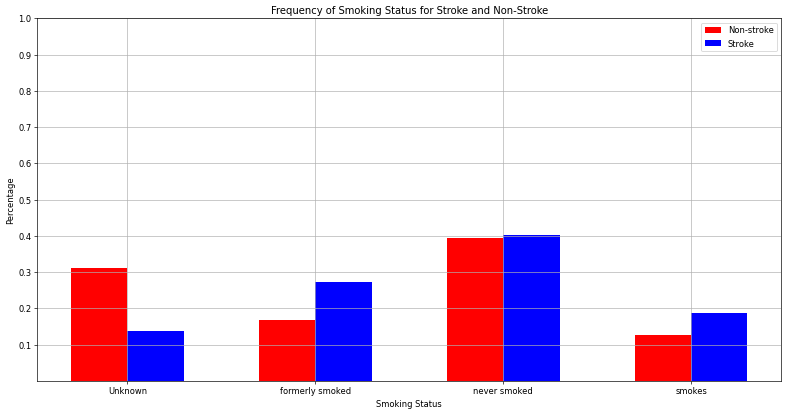

This table shows that there are more occurences of a stroke in people who have a history of smoking and who currently smoke. We can see this from the difference in height of the bars under the 'smokes' and 'formerly smoked' column - the blue bar (has had a stroke) is greater than the red bar.


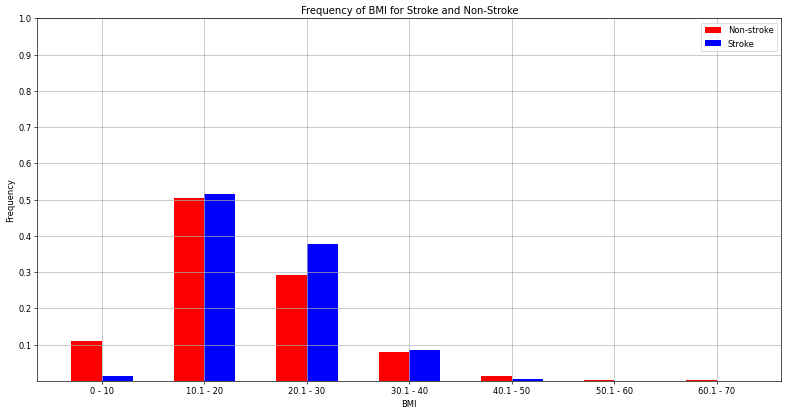

This table shows the relationship between the BMI for people who have had a stroke and people who have not. We can see that in the third column, stroke is much mroe frequent than non-stroke Which tells us that stroke is more frequent in higher BMI's


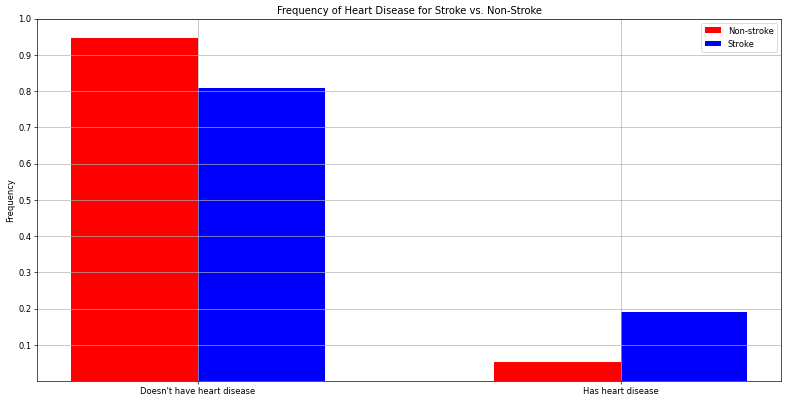

This figure of comparing the people who have and don't have heart disease which the relationship of if they, or if they didn't have a stroke. We can see that there are more people who do not have heart disease, that also have not had a stroke. On the other hand, we can see that in people who do have heart diesease, stroke is more common.


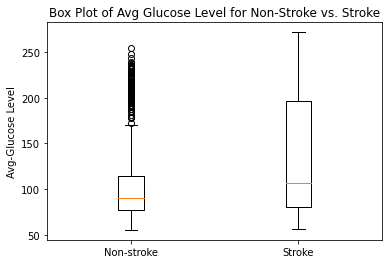

This box plot is comparing the average glucose level of people who have had a stroke with people who have not had a stroke. We can see from the graph, that for people who have had a stroke, there is a much larger range of glucose levels. That tells us that there are more people with a higher glucose levels who have had a stroke than who haven't.


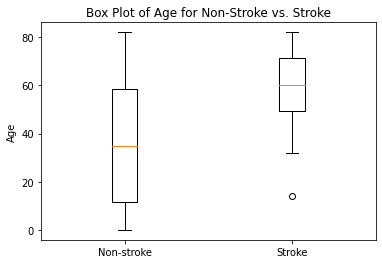

This box plot is showing of the range of people's age who have and haven't had a stroke. We can clearly see that the average age in people who have had a stroke is much higher than the average of people who haven't had a stroke.


In [68]:
import eda_work
eda_work.run_eda()

From these data visualizations, we determined the most relevant attributes to be the following: **smoking status, BMI, heart disease, average glucose levels, age**
* Note- we did create more visualizations such as pie charts, but they didn't provide any information regarding relevance of attributes so they are not included

# Data Classification

>* This section should describe the classification approach you developed and its performance. 


Once we determined the best attributes to use for classification, we used **10 fold cross validation** with each of our 4 classifiers: **kNN, Naive Bayes, Decision Tree, and Random Forest**. This implementation is located in classification_work, called in the code cell below.
* NOTE: positive class label is 1, or stroke, for the confusion matrices
We calculated accuracy, precision, recall, and F1 measures for each classifier.

In [69]:
import classification_work
importlib.reload(classification_work)

#classification AFTER attribute selection (based on EDA)
classification_work.classify_data("input_data/stroke_data_atts_selected.csv", random_seed)


-------CLASSIFIYING DATA...-----
attribute names: ['age', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
classes: [1.0, 0.0]
num instances of class 0.0 : 791
num instances of class 1.0 : 209

kNN Classifier (5 neighbors)
Accuracy:	 0.75
Error Rate:	 0.25
Precision:	 0.19
Recall:		 0.05
F1 measure:	 0.08
Confusion matrix:
       1.0    0.0
--  -----  -----
 1     11    198
 0     48    743

Naive Bayes
Accuracy:	 0.79
Error Rate:	 0.21
Precision:	 0
Recall:		 0.0
F1 measure:	 0
Confusion matrix:
       1.0    0.0
--  -----  -----
 1      0    209
 0      0    791

Decision Tree
Accuracy:	 0.79
Error Rate:	 0.21
Precision:	 0.27
Recall:		 0.01
F1 measure:	 0.03
Confusion matrix:
       1.0    0.0
--  -----  -----
 1      3    206
 0      8    783

Random Forest
Accuracy:	 0.79
Error Rate:	 0.21
Precision:	 0.0
Recall:		 0.0
F1 measure:	 0
Confusion matrix:
       1.0    0.0
--  -----  -----
 1      0    209
 0      1    789


(to view entire classification output, click open in a text editor)
## Classification Comparison & Results

>* Explain what techniques you used, briefly how you designed and implemented the classifiers, how you evaluated your classifiers’ predictive ability, and how well the classifiers performed.
>* Thoroughly describe how you evaluated performance, the comparison results, and which classifier is “best”. 
>* Create a Flask web app with this “best” classifier deployed with an API interface. 
##### Training and Testing:
We used 10-fold cross validation in order to evaluate our classifiers. We chose this evaluation method because it trains and tests all instances, rather than just holding out one section to test.

##### Classifier comparison:
Our classifiers did not perform very well due to the imbalance of class labels, and the high probability of an instance not having a stroke. Naive Bayes and decision trees are based on these probabilities. They all had the same accuracy of **79%**, as well as precision, recall, and F1 of **0%**. Our kNN classifier, although having a lower accuracy of **75%**, had higher precision, recall and F1.
* kNN Precision: 22%
    * meaning: 22% probability that a patient classified as "stroke" (1) is correctly classified
* kNN Recall: 7%
    * meaning: 7% probability that a patient who will have a stroke is won't go unmissed
##### "Best" Classifier:
Although kNN had the worst accuracy, we know that accuracy does not tell the whole story. Naive Bayes, Decision Tree, and Random Forest classifiers all had a 0% probability of correctly classifying strokes, and 0% probability of detecting stroke instances.
* In order to be sure, we changed the random seed 5 times, and saw similar results: mid-high 70s% accuracies for all classifiers, but higher precision and recall in the kNN Classifier than all others

Admittedly, these classifiers did not perform very well, however, the best classifier of the four was our k Nearest Neighbors with 5 neighbors (which also performed better than 3 neighbors).
* The flask app containing our k Nearest Neighbors classifier is located in `project_app.py`

In [70]:
#TODO: flask web app

# Conclusion
Provide a brief conclusion of your project, including a short summary of the dataset you used (and any of its inherent challenges for classification), the classification approach you developed, your classifiers’ performance, and any ideas you have on ways to improve its performance. 
